# 1º: Setting the work environment up

In [ ]:
!pip install fastf1

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup plotting (helper functions)
plotting.setup_mpl()

# Set the cache directory (need a 'cache' folder) avoid long waiting times
ff1.Cache.enable_cache('/content/drive/MyDrive/F1/cache')

# Ignore pandas warnings
pd.options.mode.chained_assignment = None

# 2º: Select the data

In [ ]:
# Race to analyze
race = ff1.get_session(2023, 'Singapore', 'R')

In [ ]:
# Get the selected race info
race.load()

In [ ]:
# Get the race laps
laps = race.laps

In [ ]:
# Choose the drivers to be studied
driver1 = 'SAI'
driver2 = 'NOR'

In [ ]:
# Get the laps info of the drivers
laps_driver1 = laps.pick_driver(driver1)
laps_driver2 = laps.pick_driver(driver2)

In [ ]:
# Fastest lap of each driver
print(f"Fastest lap of {driver1}: {laps_driver1['LapTime'].min()}")
print(f"Fastest lap of {driver2}: {laps_driver2['LapTime'].min()}")

Fastest lap of SAI: 0 days 00:01:37.666000
Fastest lap of NOR: 0 days 00:01:38.046000


In [ ]:
# Info about the fastest race lap
fastest_lap = laps.pick_fastest()

print('Fastest lap: ', fastest_lap['LapTime'])
print('Fastest lap on lap number', fastest_lap['LapNumber'])
print(f"Tyre compound: {fastest_lap['Compound']}, with {fastest_lap['TyreLife']} laps of use")
print('Driver: ', fastest_lap['Driver'])

Fastest lap:  0 days 00:01:35.867000
Fastest lap on lap number 47.0
Tyre compound: MEDIUM, with 3.0 laps of use
Driver:  HAM


#3º: Plotting

In [ ]:
driver1_color = ff1.plotting.driver_color(driver1)
driver2_color = ff1.plotting.driver_color(driver2)

In [ ]:
# We remove slow laps to avoid distorting the results
quicks_laps_driver1 = laps.pick_driver(driver1).pick_quicklaps()
quicks_laps_driver2 = laps.pick_driver(driver2).pick_quicklaps()

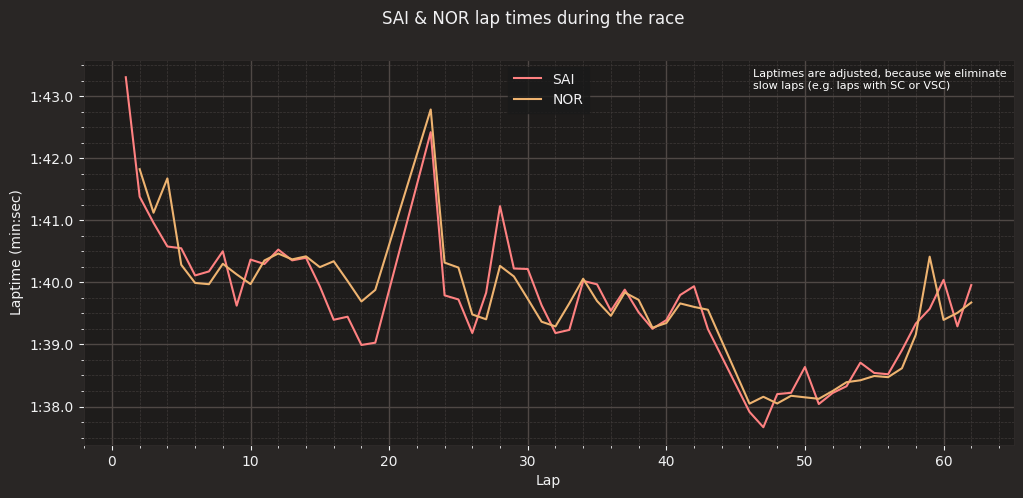

In [ ]:
# Lap time analysis of both drivers during the race
fig, ax = plt.subplots(figsize=(12,5))

fig.suptitle(f"{driver1} & {driver2} lap times during the race")

ax.plot(quicks_laps_driver1['LapNumber'], quicks_laps_driver1['LapTime'], label=driver1, color=driver1_color)
ax.plot(quicks_laps_driver2['LapNumber'], quicks_laps_driver2['LapTime'], label=driver2, color=driver2_color)

plt.text(0.72, 0.92, "Laptimes are adjusted, because we eliminate \nslow laps (e.g. laps with SC or VSC)",
         transform=ax.transAxes, fontsize=8, color='white', ha='left', va='bottom')

ax.set(ylabel='Laptime (min:sec)', xlabel='Lap')
ax.legend(loc="upper center")

plt.show()

**Telemetry**

In [ ]:
# Get lap 61 telemetry data
telemetry_driver1 = laps_driver1.loc[laps_driver1['LapNumber']==61].get_car_data().add_distance()
telemetry_driver2 = laps_driver2.loc[laps_driver2['LapNumber']==61].get_car_data().add_distance()

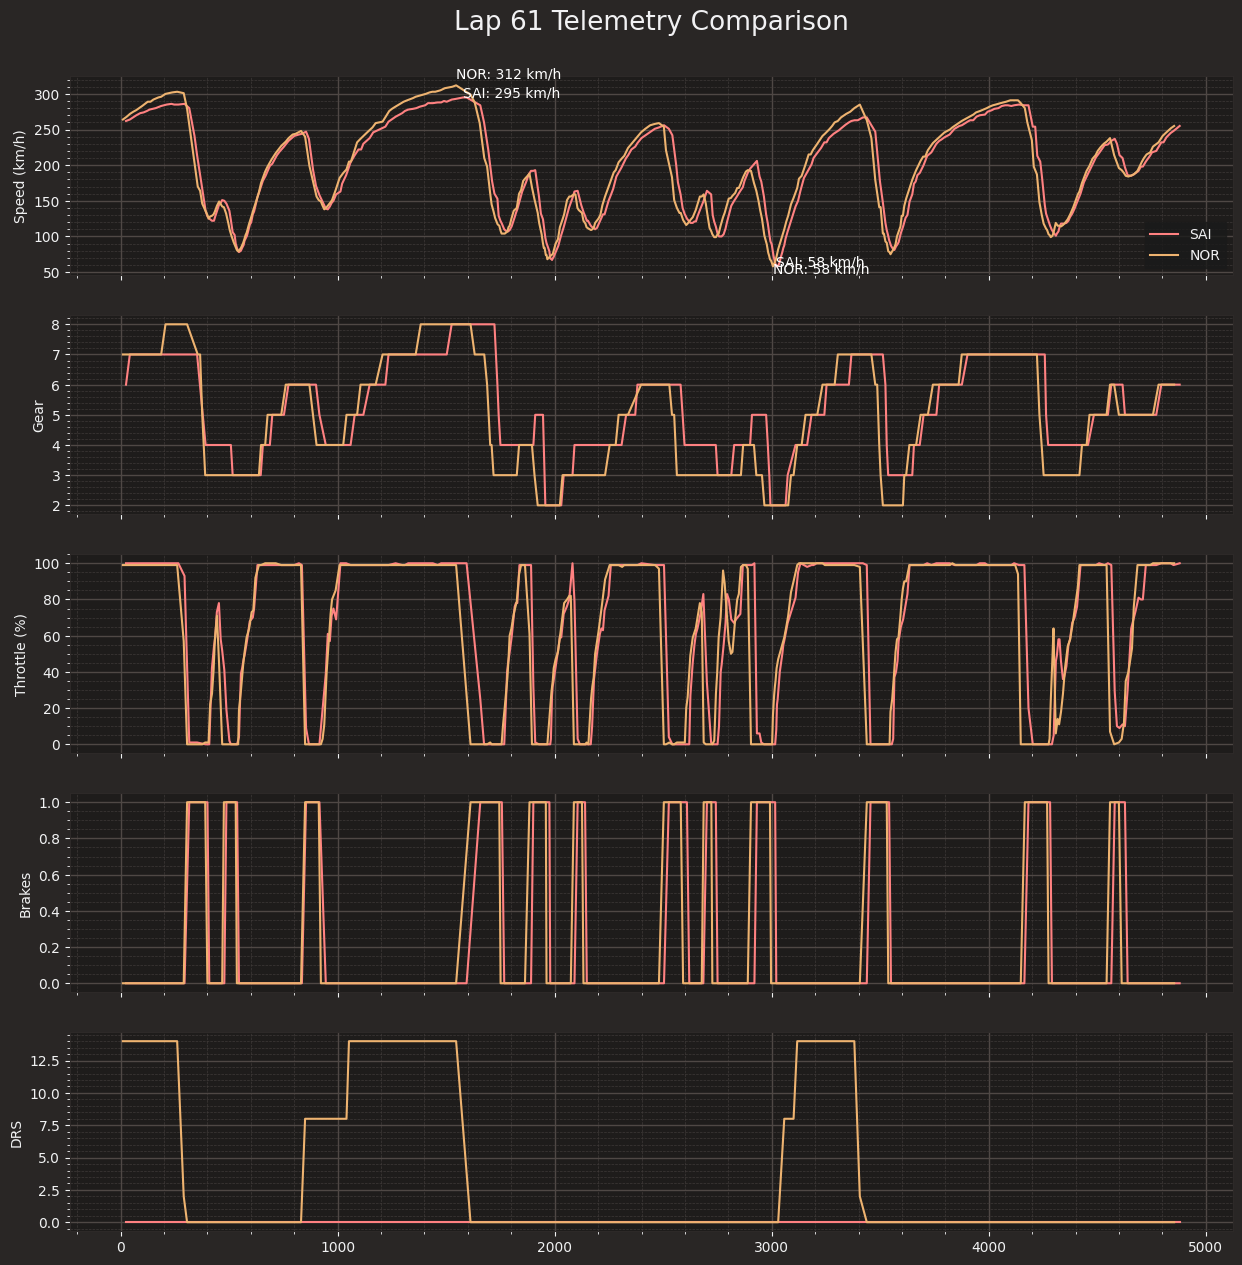

In [ ]:
# Telemetry analysis (Speed, Gear, Throttle, Brake, DRS)
fig, ax = plt.subplots(5, figsize=(15,15))

ax[0].title.set_text("Lap 61 Telemetry Comparison\n")

ax[0].plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label=driver1, color=driver1_color)
ax[0].plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label=driver2, color=driver2_color)
ax[0].set(ylabel='Speed (km/h)')
ax[0].legend(loc="lower right")

# Maximum and Minimum speed of drivers
driver1_max_speed = telemetry_driver1['Speed'].max()
driver1_min_speed = telemetry_driver1['Speed'].min()
driver2_max_speed = telemetry_driver2['Speed'].max()
driver2_min_speed = telemetry_driver2['Speed'].min()
ax[0].annotate(f'{driver1}: {driver1_max_speed} km/h', (telemetry_driver1['Distance'][telemetry_driver1['Speed'].idxmax()], driver1_max_speed), textcoords="offset points", xytext=(0, 0), ha='left', color='white')   #valores x,y | posición texto
ax[0].annotate(f'{driver1}: {driver1_min_speed} km/h', (telemetry_driver1['Distance'][telemetry_driver1['Speed'].idxmin()], driver1_min_speed), textcoords="offset points", xytext=(0, 0), ha='left', color='white')
ax[0].annotate(f'{driver2}: {driver2_max_speed} km/h', (telemetry_driver2['Distance'][telemetry_driver2['Speed'].idxmax()], driver2_max_speed), textcoords="offset points", xytext=(0, 5), ha='left', color='white')
ax[0].annotate(f'{driver2}: {driver2_min_speed} km/h', (telemetry_driver2['Distance'][telemetry_driver2['Speed'].idxmin()], driver2_min_speed), textcoords="offset points", xytext=(0, -5), ha='left', color='white')

ax[1].plot(telemetry_driver1['Distance'], telemetry_driver1['nGear'], label=driver1, color=driver1_color)
ax[1].plot(telemetry_driver2['Distance'], telemetry_driver2['nGear'], label=driver2, color=driver2_color)
ax[1].set(ylabel='Gear')

ax[2].plot(telemetry_driver1['Distance'], telemetry_driver1['Throttle'], label=driver1, color=driver1_color)
ax[2].plot(telemetry_driver2['Distance'], telemetry_driver2['Throttle'], label=driver2, color=driver2_color)
ax[2].set(ylabel='Throttle (%)')

ax[3].plot(telemetry_driver1['Distance'], telemetry_driver1['Brake'], label=driver1, color=driver1_color)
ax[3].plot(telemetry_driver2['Distance'], telemetry_driver2['Brake'], label=driver2, color=driver2_color)
ax[3].set(ylabel='Brakes')

ax[4].plot(telemetry_driver1['Distance'], telemetry_driver1['DRS'], label=driver1, color=driver1_color)
ax[4].plot(telemetry_driver2['Distance'], telemetry_driver2['DRS'], label=driver2, color=driver2_color)
ax[4].set(ylabel='DRS')

# Hide axis labels on subplots that are not on the outer edges
for a in ax.flat:
    a.label_outer()

plt.show()